# Godel, Escher, Bach: The Notebook

## Chapter 1: A Musico-Logical Offering

In this chapter, the author outlines the broad ideas that GEB will be about. The title of the chapter is, of course, a play on words - It is an offering of "Music" and "Logic", but Musicological also refers to the study of music. In another sense, this chapter essentially is the dedication of an offering to the reader. In the same way that Bach made an offering of music to King Frederick, the Author is making an offering to us, which is the entire book. In a sense, therefore, this chapter is, itself, a strange loop.

### Bach

**Canon** A complex musical composition involving more than one player playing variations of one central theme. The allowed variations are: 
 - Variations in time (ie, stagered starts)
 - Variations in pitch (the entire theme is shifted up or down by some constant amount)
 - Inversion (the theme is "flipped" upside down)
What makes canons non-trivial is the fact that the end result must, of course, sound good. Some pairs of notes harmonize well, while most others do not. Imaginably, the difficulty of creating such a work grows with the number of players. In response to a rumor about Bach improvising a six-part canon, the Author likens this task to winning 64 games of chess, at the same time, whilst blindfolded.

The interesting thing about all of these variations is that they are **isomorphic**. That means that information about the original information is preserved after transformations, and can be retrieved again. 

Here's an example. Say we have this theme

```
ABCCCCBA
```

If I were to shift each of these notes up by one, like this

```
ORIGINAL: ABCCCCBA
PITCH UP: BCDDDDCB
```

You would still be able to deduce the original pattern, knowing how I produced it. This makes this transformation isomorphic.  If, however, I used a rule where I only set B = A, like this

```
ORIGINAL: ABCCCCBA
FUNKY   : AACCCCAA
```

I would _not_ be able to figure out what the original was, because I wouldn't know if an "A" was always an "A", or if it was previously a "B"!

You could think of an isomorphism as a type of code, or even a puzzle. Bach himself did, hiding variations of one theme and challenging listeners to find it! I am sure that the Author will make a similar challenge to us, as the readers...

One particular canon is singled out by the Author, called Canon per Tonos, or, as the Author likes to call it, **["The Eternally Rising Canon".](https://www.youtube.com/watch?v=A41CITk85jk)**. It does, in fact, eternally rise. I am reminded of the good old fashioned [Sherpherd's Tone](https://www.youtube.com/watch?v=u9VMfdG873E). Anyways, the Author uses this as the first example of a **strange loop**, as by continuing through a "heirarchy" (ie, the tune) we end up exactly where we started (the key of c). Somewhat confusingingly, these are also refered to as **"Twisted Hierarchies"**.

### Escher

What the Eternally Rising Canon is to music, Escher's waterfall is to art. Notice how the water ends up exactly where it started.

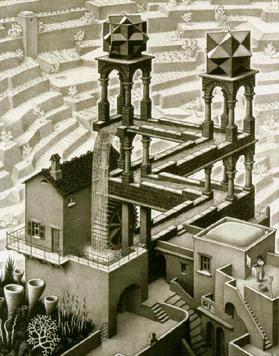

The Author claims that this image represents a strange loop with six "steps". The author promises that, eventually, he will explain exactly what a "step" is... but in the above, it is pretty clear what he means (1 pond + 4 channels + 1 waterfall).

The author points out that by viewing an Escher painting with multiple levels, we are, ourselves, taking place in a hierarchy, which makes us wonder if there are any levels beyond ourselves, looking at us. 🤯

### Godel

I'm going to keep it real with you all - I didn't understand what the heck Godel's proof was the first time I read GEB. Luckily, in the time since 1979, a little thing called "The Internet" was invented, and with it, a whole bunch of smart people started making really good explanations of math stuff. A pretty good one that explains Godel's proof is [Veritasium's video on the subject.](https://www.youtube.com/watch?v=HeQX2HjkcNo&t=1827s). It's not *perfect*, but it at least communicates the basic ideas. Of course, the author explains it better as long as you have a general notion of what he is talking about.

I won't write much more about this here. Try your best to understand it, but don't beat yourself up if you don't - it will be explained in much more detail later, I promise you :).

You're probably aware of what **paradoxes** are. A famous example that is mentioned quite a bit is the **Epimenides paradox**, which is "This sentense is false". The problem with this statement is that if you assume it is true, it becomes false, and if you assume it is false, it becomes true. One might call this... a loop. A "strange" loop, perhaps. Another example is **Grelling's Paradox**, which asks if the set of all self-containing ("self-swallowing") sets contains itself. (This is more easily illustrated by asking if "non-self-descriptive" is itself non-self-descriptive, which again forms a loop, because if you assume it *is*, then it isn't, but if you assume it *isn't*, then it is.)

Anyways, various people didn't like that very much, including **Russel and Whitehead**, who wrote a book called **Prinicipia Mathematica**, for the express purpose of creating a language in which there were absolutely ~~nothing interesting~~ no paradoxes, by banning self-reference. This was fairly absurd, and the author points out a lot of silly things about this endevor. However, **Kurt Godel** proved that this was impossible, with **Godel's Incompleteness Thereom**.

Godel proved that any logical system like Principia Mathematica could not be both **consistent** (free from contradictions) and **complete** (containing all true statements).

### Widget 1: Interactive Isomorphism Interrogator

Below, you will see my first widget. The purpose of this widget is to help you understand the notion of a *polymorphism*, in the context of music. There are three buttons available, each corresponding to one of the transformations mentioned by the author. You can also customize the original input.

Try to create a sequence of transformations that yields the original. Then, update the original. Notice that any value of the original will be preserved equally. This is the essence of polymorphism - the preservation of information.

In [1]:
from jp_doodle import dual_canvas
from IPython.display import display, clear_output
import ipywidgets as widgets

ORIGINAL = ["R", "I", "C", "E", "C", "A", "R"]
TIME_SHIFT = 0
PITCH_SHIFT = 1
INVERSION = 2

TRANSFORMS = [
]

def pitch_shift(note, amount):
    alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    initial = alphabet.index(note.lower())
    return alphabet[(initial+amount)%len(alphabet)].upper()

def invert(note):
    alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    initial = alphabet.index(note.lower())
    return alphabet[(len(alphabet)-initial)%len(alphabet)].upper()

def print_melody(y_start, offset, square_size, melody, widget, note, green=False):
    #print the note
    text_x_1 = -2*square_size
    widget.text(
        x = text_x_1,
        y = -1*y_start*square_size,
        text=note
    )
    
    for i, note in enumerate(melody):
        x1 = offset*square_size + i*square_size
        y1 = -1 * square_size*y_start
        if green:
            widget.rect(
                x=x1,
                w=square_size,
                y=y1,
                h=square_size,
                fill=True,
                color="green")
            widget.text(
                x = x1,
                y = y1,
                text = f"{note}",
                font = f"{square_size}px Courier",
                color = "white"
            )
        else:
            widget.rect(
                x=x1,
                w=square_size,
                y=y1,
                h=square_size,
                fill=False)
            widget.text(
                x = x1,
                y = y1,
                text = f"{note}",
                font = f"{square_size}px Courier"
            )
def py_no_name_no_event():
    widget = dual_canvas.DualCanvasWidget(width=500, height=500)
    offset = 0
    current = ORIGINAL
    print_melody(0, offset, 30, current, widget, "O", green=True)
    for i, transform in enumerate(TRANSFORMS):
        description = ""
        if transform[0] == TIME_SHIFT:
            offset+=transform[1]
            description = f"T+{transform[1]}"
        elif transform[0] == PITCH_SHIFT:
            current = [pitch_shift(note, transform[1]) for note in current]
            description = f"P+{transform[1]}"
        else:
            current = [invert(note) for note in current]
            description = f"INVERT"
        print_melody(i+1, offset, 30, current, widget, description, green=(offset == 0) and (current == ORIGINAL))
    widget.fit()
    display(widget)



def add_time_shift(a):
    TRANSFORMS.append([TIME_SHIFT, amount_entry.value])
    show_iii()

def add_pitch_shift(a):
    TRANSFORMS.append([PITCH_SHIFT, amount_entry.value])
    show_iii()

def add_inversion(a):
    TRANSFORMS.append([INVERSION])
    show_iii()

def update_original(a):
    global ORIGINAL
    ORIGINAL = list(original_entry.value.upper())
    show_iii()
    
amount_entry = widgets.IntText(description="Amount")
original_entry = widgets.Text(description="Original")
ts_button = widgets.Button(description="Time Shift")
ts_button.on_click(add_time_shift)
ps_button = widgets.Button(description="Pitch Shift")
ps_button.on_click(add_pitch_shift)
i_button = widgets.Button(description="Invert")
i_button.on_click(add_inversion)
uo_button = widgets.Button(description="Update Original")
uo_button.on_click(update_original)

def show_iii():
    clear_output(wait=True)
    original_entry.value = "".join(ORIGINAL)
    display(original_entry)
    display(uo_button)
    
    display(amount_entry)
    display(ts_button)
    display(ps_button)
    display(i_button)
    
    py_no_name_no_event()

show_iii()


Text(value='RICECAR', description='Original')

Button(description='Update Original', style=ButtonStyle())

IntText(value=0, description='Amount')

Button(description='Time Shift', style=ButtonStyle())

Button(description='Pitch Shift', style=ButtonStyle())

Button(description='Invert', style=ButtonStyle())

DualCanvasWidget(status='deferring flush until render')

## Chapter 1.5: Three Part Invention

These between chapter short-stories not only serve as a short break from the heady subject of the rest of the book, but also serve as a gentle introduction to ideas that will be introduced later, so one would do well to pay attention!

This chapter is jam-packed with ideas, themes, and lots of jokes, all while introducing us to characters that seem remarkably compelling. I'll do my best to break it all down.

One thing you should know before reading is that [Zeno](https://en.wikipedia.org/wiki/Zeno%27s_paradoxes) was a real person, and he really didn't think motion existed. He gave a pretty good argument for why movement _cannot_ exist, as well, of which a variation is the very story we are reading. I won't bother with the specifics of Zeno's argument, because it really isn't the point of the story.

We meet two characters, the Tortoise and Achilles. These two characters personify two different approaches to understanding. Achilles represents a practical, experiential sort of understanding - he percieves the world, and describes the world in the way that it evidently is. For example, he percieves a flag waving in the wind, and remarks that it is waving. The Tortoise, on the other hand, uses logic to understand the world, and, when logic disagrees with his perception, he prioritizes logic. For example, when he sees the same flag waving in the air, he refuses to acknowledge this is possible, because Zeno's proof convinced him that motion was impossible.

Eventually, Zeno himself shows up, and explains the paradox (Using the exact same characters, of course - this is GEB, after all), declaring that this is his new Thereom - that Motion Unexists. Achilles remarks that something about this seems wrong - after all, things _seem_ to move. 

This story really illustrates the danger of declaring something as "false" or "wrong" just because it causes a paradox. It also illustrates the absurdity that results from banishing such "contradictory" thought, which was a theme in the previous chapter.

Stay on the lookout for jokes, puns, callbacks, and general jabs. 

In [86]:
CURRENT_STATE = "MI"
PREVIOUS_STATE = "MI"
INDEX_TO_WIDGET = {}
CLICKED_INDEX_1 = -1
TIME = 1
def draw_on_canvas(widget):
    global PREVIOUS_STATE, TIME
    square_size = 30
    
    
    #draw a big white rectangle over the previous
    widget.rect(x = 0, y = 0-square_size, w = square_size*len(PREVIOUS_STATE), h = square_size*2, color="white", fill=True)
    bigText = widget.text(y = 0-square_size, x = 0, text="Hello", name=True, font="3px Courier")
    
    INDEX_TO_WIDGET = {}
    CLICKED_INDEX_1 = -1
    for i, letter in enumerate(CURRENT_STATE):
        square_name = f"{TIME} {i}"
        
        square = widget.rect(x = i*square_size,
                    y = 0, 
                    w = square_size,
                    h = square_size,
                    fill=True,
                    color = "white",
                    name=square_name)
        
        INDEX_TO_WIDGET[i] = square
        
        def my_callback(e):
            global CLICKED_INDEX_1, CURRENT_STATE, PREVIOUS_STATE, TIME
            try:
                index_clicked = int(e['canvas_name'].split(" ")[1])
                INDEX_TO_WIDGET[index_clicked].change(color="yellow")
                bigText.change(text=f"{index_clicked}, p = {CLICKED_INDEX_1}")
                print("HELLO")
                if CLICKED_INDEX_1 == -1:
                    CLICKED_INDEX_1 = index_clicked
                    for i in INDEX_TO_WIDGET.values():
                        i.change(color="white")
                    INDEX_TO_WIDGET[index_clicked].change(color="yellow")
                else:
                    # handle first is M - execute M rule
                    first_index = min(CLICKED_INDEX_1, index_clicked)
                    last_index = max(CLICKED_INDEX_1, index_clicked)
                    first_symbol = CURRENT_STATE[first_index]
                    last_symbol = CURRENT_STATE[last_index]

                    end_symbols = [first_symbol, last_symbol]
                    if "M" == first_symbol:
                        bigText.change(text=f"BRUH that's an M")
                        PREVIOUS_STATE = CURRENT_STATE
                        
                        pre = CURRENT_STATE[:first_index]
                        x = CURRENT_STATE[first_index+1:last_index+1]
                        post = CURRENT_STATE[last_index+1:]
                        
                        CURRENT_STATE = pre + "M" + x + x + post
                        bigText.change(text=f"pre = {pre} x = {x} post = {post}")
                        TIME+=1
                        draw_on_canvas(widget)
                    if end_symbols == ["I", "I"] and first_index != last_index:
                        
                        internal = CURRENT_STATE[first_index+1:last_index+1]
                        if "M" in internal or "U" in internal:
                            bigText.change(text=f"There's an M or a U in there")
                        elif (last_index - first_index + 1)%3 != 0:
                            bigText.change(text=f"Not mod 0, {last_index-first_index}, {first_index}, {last_index}")
                        else:
                            bigText.change(text=f"BRUH that's an I")
                            PREVIOUS_STATE = CURRENT_STATE

                            pre = CURRENT_STATE[:first_index]
                            x = CURRENT_STATE[first_index+1:last_index+1]
                            post = CURRENT_STATE[last_index+1:]

                            CURRENT_STATE = pre + "U"*int(((last_index-first_index)/3) + 1) + post
                            bigText.change(text=f"pre = {pre} x =  post = {post}")
                            TIME+=1
                            draw_on_canvas(widget)
                    if end_symbols == ["U", "U"]:
                        internal = CURRENT_STATE[first_index+1:last_index+1]
                        if "M" in internal or "I" in internal:
                            bigText.change(text=f"There's an I or a M in there")
                        elif (last_index - first_index + 1)%2 != 0:
                            bigText.change(text=f"Not mod 0, {last_index-first_index}, {first_index}, {last_index}")
                        else:
                            bigText.change(text=f"BRUH that's a U")
                            PREVIOUS_STATE = CURRENT_STATE

                            pre = CURRENT_STATE[:first_index]
                            x = CURRENT_STATE[first_index+1:last_index+1]
                            post = CURRENT_STATE[last_index+1:]

                            CURRENT_STATE = pre + post
                            bigText.change(text=f"pre = {pre} post = {post}")
                            TIME+=1
                            draw_on_canvas(widget)
                    if first_index == last_index and first_symbol == "I":
                        PREVIOUS_STATE = CURRENT_STATE
                        CURRENT_STATE = CURRENT_STATE+"U"
                        TIME+=1
                        draw_on_canvas(widget)
                    CLICKED_INDEX_1 = -1
            except BaseException as e:
                bigText.change(text=f"Unexpected {e}, {type(e)}")
        
        square.on("click", my_callback)
        
        widget.text(text = f"{letter}",
                   font = f"{square_size}px Courier",
                   x = i*square_size,
                   y = 0)
    widget.fit()

def show_canvas():
    widget = dual_canvas.DualCanvasWidget(width=500, height=100)
    draw_on_canvas(widget)
    display(widget)

show_canvas()

DualCanvasWidget(status='deferring flush until render')